<a href="https://colab.research.google.com/github/prikshit-2000/Tensorflow/blob/main/MNIST_Autoencoder_ipynbplt_subplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.layers import Dense,Conv2D,Input
from tensorflow.keras import Sequential,Model
from tensorflow.keras.utils import plot_model
import  tensorflow_datasets as tfds
import warnings
warnings.filterwarnings('ignore')


In [114]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [115]:

config = {
    "learning_rate" : 0.01,
    "architecture" : "Autoencoder",
    "dataset" : "mnist",
    "infra" : "colab",
    "optimizer" : "adam",
    "batch_size" : 64,
    "epochs" : 10,
    "loss" : 'binary_crossentropy'
}
wandb.init(
    project = "mnist_autoencoder",
    notes = "first training",
    tags = ['first'],
    config = config
)
config = wandb.config

In [116]:
def preprocess(image,label):
    image = tf.cast(image,tf.float32)
    image = image /255.0
    image = tf.reshape(image,shape =(784,))
    return image,image

In [117]:


train_dataset = tfds.load('mnist',split = 'train',as_supervised=True).map(preprocess).shuffle(1024).batch(BATCH_SIZE).repeat().prefetch(tf.data.experimental.AUTOTUNE)


test_dataset = tfds.load('mnist',split = 'test',as_supervised=True).map(preprocess).shuffle(1024).batch(BATCH_SIZE).repeat().prefetch(tf.data.experimental.AUTOTUNE)

In [118]:
def autoencoder(inputs):
    
    encoder  = Dense(32,activation = 'relu')(inputs)
    encoder_output = Model(inputs = inputs , outputs = encoder)
                                
    decoder = Dense(784,activation='sigmoid')(encoder)
    decoder_output = Model(inputs = inputs , outputs = decoder)
                    
    return encoder_output,decoder_output
    

In [119]:
inputs = Input(shape = (784,))
encoder,decoder  = autoencoder(inputs)


In [120]:
# encoder.compile(loss = config.loss ,optimizer = config.optimizer,metrics = ['loss'])
decoder.compile(loss = config.loss ,optimizer = config.optimizer)

In [121]:

decoder.fit(train_dataset,epochs  = config.epochs,steps_per_epoch = 100)
# decoder.fit()

Epoch 1/10
100/100 [==============================] - 2s 12ms/step - loss: 0.3641
Epoch 2/10
100/100 [==============================] - 1s 12ms/step - loss: 0.2301
Epoch 3/10
100/100 [==============================] - 1s 12ms/step - loss: 0.1977
Epoch 4/10
100/100 [==============================] - 1s 12ms/step - loss: 0.1824
Epoch 5/10
100/100 [==============================] - 1s 12ms/step - loss: 0.1703
Epoch 6/10
100/100 [==============================] - 1s 12ms/step - loss: 0.1611
Epoch 7/10
100/100 [==============================] - 1s 12ms/step - loss: 0.1530
Epoch 8/10
100/100 [==============================] - 1s 12ms/step - loss: 0.1457
Epoch 9/10
100/100 [==============================] - 1s 12ms/step - loss: 0.1401
Epoch 10/10
100/100 [==============================] - 1s 7ms/step - loss: 0.1338


In [126]:
def display_one_row(disp_images , offset , shape = (28,28)):
    for idx,test_image in enumerate(disp_images):
        plt.subplot(3,10,offset + idx+1)
        plt.yticks([])
        plt.xticks([])
        test_image = tf.reshape(test_image,shape)
        plt.imshow(test_image,cmap = 'gray')

def display_results(disp_input_images , disp_encoded , disp_predicted , enc_shape = (8,4)):
    plt.figure(figsize = (12,8))
    display_one_row(disp_input_images , 0)
    display_one_row(disp_encoded,10,enc_shape)
    display_one_row(disp_predicted,20)


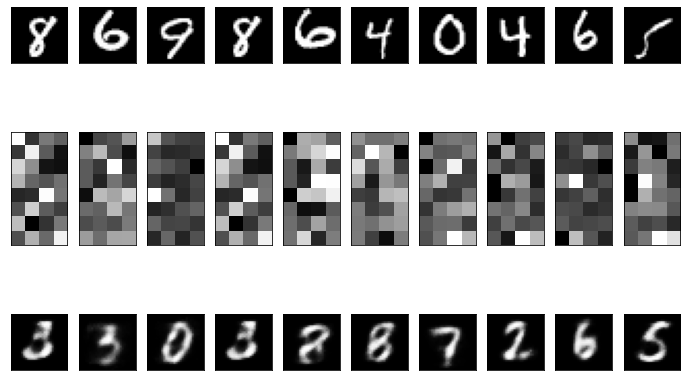

In [127]:
test_dataset = test_dataset.take(1)
output_samples = []
for input_image,image in tfds.as_numpy(test_dataset):
    output_samples = input_image
idxs = np.random.choice(config.batch_size,size = 10)
encoded_predicted = encoder.predict(test_dataset)
simple_predicted = decoder.predict(test_dataset)
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])
